# EDA Nicoya planet image

The following is a simple exploration of the planet scope image


In [36]:
import rasterio
from rasterio.plot import show
from rasterio.plot import show_hist
import numpy as np
import matplotlib.pyplot as plt

## Data import

In [2]:
image_path = "planet_images/20240210_161110_08_247d_3B_AnalyticMS.tif"
nicoya_raster = rasterio.open(image_path)

## Image information

 - I'm going to use GDAL to extract the image metadata

In [13]:
!gdalinfo $image_path

Driver: GTiff/GeoTIFF
Files: planet_images/20240210_161110_08_247d_3B_AnalyticMS.tif
Size is 11252, 7959
Coordinate System is:
PROJCRS["WGS 84 / UTM zone 16N",
    BASEGEOGCRS["WGS 84",
        DATUM["World Geodetic System 1984",
            ELLIPSOID["WGS 84",6378137,298.257223563,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4326]],
    CONVERSION["UTM zone 16N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-87,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],


- This can also be done with some rasterio functions

In [16]:
type(nicoya_raster)

rasterio.io.DatasetReader

In [17]:
nicoya_raster.profile

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': 0.0, 'width': 11252, 'height': 7959, 'count': 4, 'crs': CRS.from_epsg(32616), 'transform': Affine(3.0, 0.0, 662412.0,
       0.0, -3.0, 1133124.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}

In [18]:
nicoya_raster.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': 0.0,
 'width': 11252,
 'height': 7959,
 'count': 4,
 'crs': CRS.from_epsg(32616),
 'transform': Affine(3.0, 0.0, 662412.0,
        0.0, -3.0, 1133124.0)}

## Image characteristics

In [3]:
# How many bands do I have?
nicoya_raster.count

4

In [4]:
# How many rows and columns do I have?
rows = nicoya_raster.height
columns = nicoya_raster.width
print(rows, columns)

7959 11252


In [5]:
# What is the CRS?
nicoya_raster.crs

CRS.from_epsg(32616)

In [11]:
# Check the values in the array
data = nicoya_raster.read()
data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

 - The print of the array shows just 0s given that it's truncated
 - If we want to know min and max values we will need a couple of functions

In [30]:
# Get max, min values for first array
# First array is blue
min_val = data[0].min()
max_val = data[0].max()
print(min_val, max_val)

0 39769


In [ ]:
# Get max, min, range values for all the bands


In [32]:
blue = data[0]
blue.ravel().shape

(89554668,)

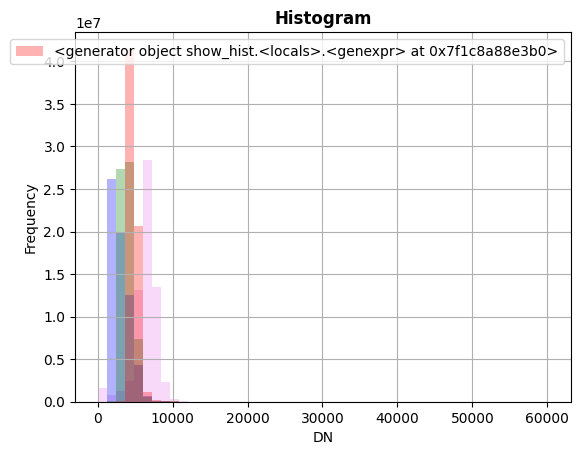

In [39]:
show_hist(nicoya_raster, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

## Plotting the image

 - At first, I want to check the image with true colors.
 - This is a Planet Scope product
 - Order of the image is blue, green, red, infrared [docs](https://developers.planet.com/docs/data/psscene/#4-band-asset-band-order)
 - Scaling needs to be done

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


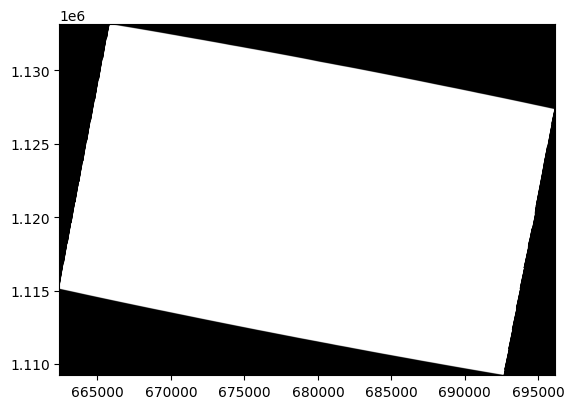

<Axes: >

In [10]:
show(nicoya_raster)

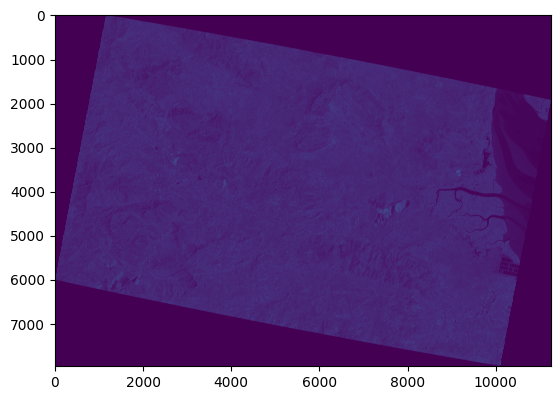

<Axes: >

In [9]:
rasterio.plot.show(
    nicoya_raster.read([4]) / 11000
)

# rasterio.plot.show(
#     nicoya_raster.read([3, 2, 1]) / 7000,
#     transform=nicoya_raster.transform
# )

## Vegetation indices

 - Given that we have 4 bands, we can calculate some indices
 - NDVI = nir - red / nir + red
 - NIRv = nir * (nir - red / nir + red)
 - EVI = 